In [1]:
%matplotlib inline
import numpy as np
#import cv2
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [2]:
filename = 'eye.jpg'

In [3]:
class Filtration:
    def __init__(self, filepath):
        self.img = np.asarray(Image.open(filepath))
    def get_grey_image(self):
        return np.apply_along_axis(self._pixel2gray, -1, self.img)
    def get_grey_image2(self):
        return np.apply_along_axis(self._pixel2gray2, -1, self.img)
    def get_negate(self):
        negated = 255-self.img
        negated[negated < 0] = 0
        return negated
    def get_brightness(self, factor:float):
        brightned = self.img*factor # Times factor but not bigger than
        brightned[brightned > 255] = 255
        return brightned
    def get_contrast(self, contrast:float):
        #http://www.dfstudios.co.uk/articles/programming/image-programming-algorithms/image-processing-algorithms-part-5-contrast-adjustment/
        F = (259 * (contrast + 255)) / (255 * (259 - contrast))
        return np.apply_along_axis(self._contrast_pixel, -1, self.img, F)
    def get_global_thresholding_simple(self, threshold):
        #http://www.cse.iitd.ernet.in/~pkalra/col783/Thresholding.pdf
        img = self.get_grey_image()
        return np.apply_along_axis(self._threshold, -1, img, threshold)
    def get_histogram(self):
        # TODO Histogram equalization
        unique, counts = np.unique(self.img, return_counts=True)
        plt.figure(figsize=(20,10))
        plt.bar(unique, counts)
    def get_image_projection_row_wise(self, threshold):
        # Transform to binamy image
        img = self.get_global_thresholding_simple(threshold)
        height, width, _ = img.shape 
        row_projection = [sum(r for r,g,b in row) for row in img]
        ran = list(range(height))
        plt.gca().invert_yaxis()
        plt.barh(ran, row_projection)
    def get_image_projection_column_wise(self, threshold):
        img = self.get_global_thresholding_simple(threshold)
        column_grey_img = np.transpose(img, (1,0,2))
        width, height , _ = column_grey_img.shape
        column_projection = [sum(r for r,g,b in column) for column in column_grey_img]
        ran = list(range(width))
        plt.bar(ran, column_projection)
        
    def _pixel2gray(self, pixel):
        grey = float(sum(pixel)//3) # Average of 3 colors
        return [grey]*len(pixel)
    def _pixel2gray2(self, pixel):
        scale = [0.2126,0.7152,0.0722] # factor to grayscale
        return [val*scal for val,scal in zip(pixel,scale)]
    def _contrast_pixel(self, pixel, factor):
        return [factor * (color - 128) + 128 for color in pixel]
    def _threshold(self, pixel, threshold):
        return [1. if color>threshold else 0. for color in pixel]
filtr = Filtration(filename)

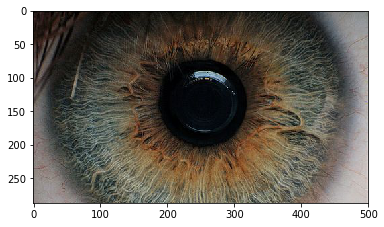

In [4]:
imshow(filtr.img)

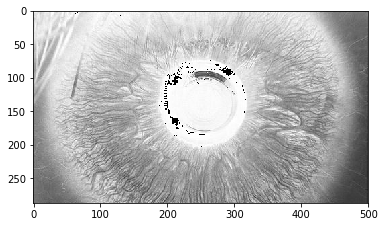

In [5]:
gray = filtr.get_grey_image()
imshow(gray)

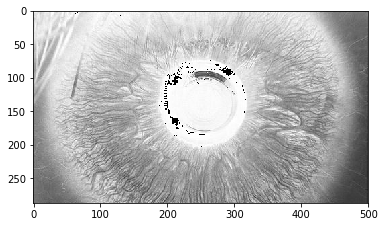

In [6]:
gray2 = filtr.get_grey_image2()
imshow(gray)

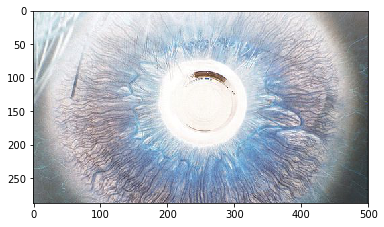

In [7]:
imshow(filtr.get_negate())

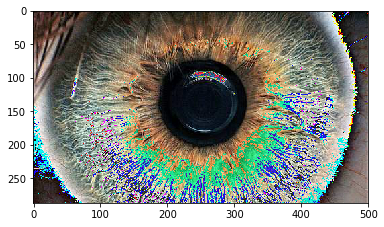

In [8]:
imshow(filtr.get_brightness(2))

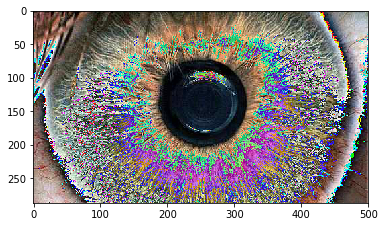

In [9]:
imshow(filtr.get_contrast(2))

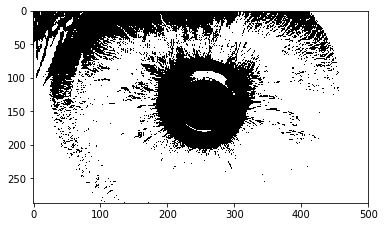

In [10]:
imshow(filtr.get_global_thresholding_simple(40))

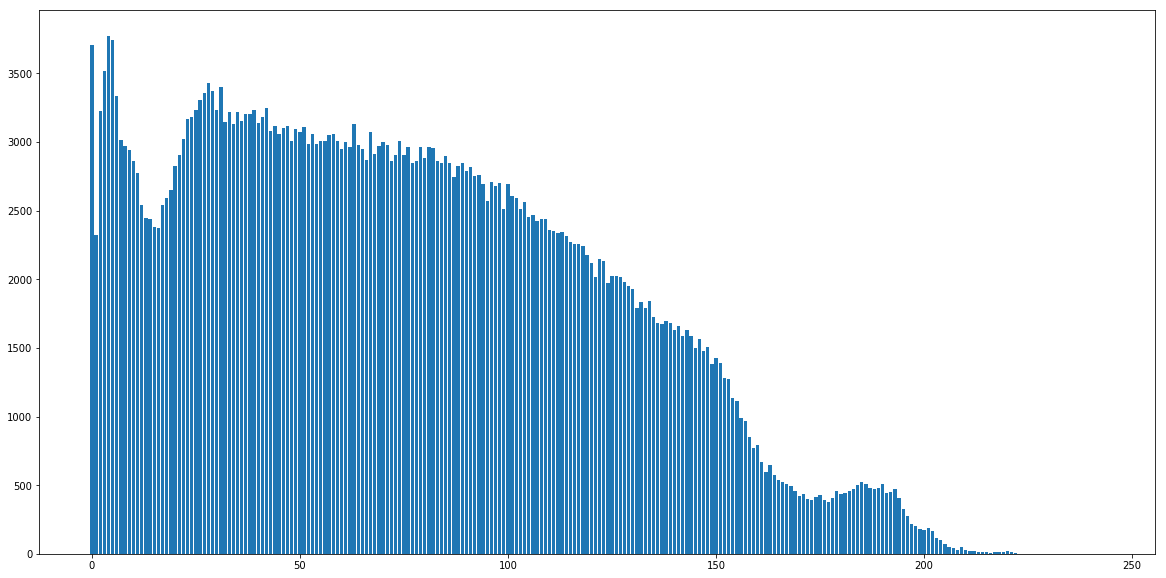

In [10]:
filtr.get_histogram()

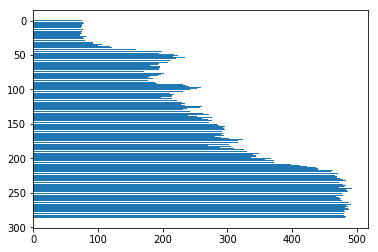

In [11]:
filtr.get_image_projection_row_wise(60)

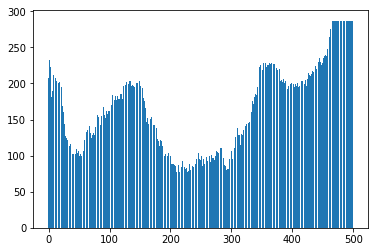

In [12]:
filtr.get_image_projection_column_wise(60)

In [17]:
img = filtr.img
basic_filter = [[0,0,0],[0,1,0],[0,0,0]]

In [94]:
basic_filter = np.array(basic_filter).flatten()
def filtring(img, my_filtr):
    new_image = []
    print(f'Applying filter {basic_filter}')
    for index, (row1,row2,row3) in enumerate(zip(img[0:],img[1:],img[2:])):
        new_image.append([])
        for frame in zip(row1[0:],row1[1:],row1[2:],row2[0:],row2[1:],row2[2:],row3[0:],row3[1:],row3[2:]):
            frame = np.array(frame)
            r, g, b = [frame[:,i] for i in range(3)]
#             print(f'Red pixels {r}')
            new_pixel = np.dot([r,g,b], my_filtr).astype(float)
            new_image[index].append(new_pixel)
#             print(f'New pixel {new_pixel}')
    return np.array(new_image)
new_image = (filtring(filtr.img, basic_filter))
print(f'origin shape {img.shape} \t new shape {new_image.shape}')

Applying filter [0 0 0 0 1 0 0 0 0]
origin shape (287, 500, 3) 	 new shape (285, 498, 3)


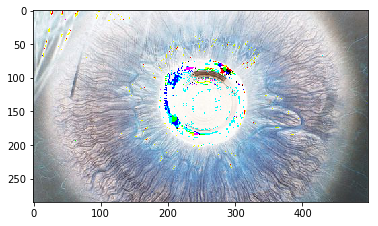

In [92]:
imshow(new_image)